In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Задача  1. Разбиение на страты

Предположим, у нас есть набор признаков, которые вычисляются независимо от эксперимента. Используя эти признаки, нужно разбить объекты на страты так, чтобы дисперсия стратифицированного среднего была минимальна и доля каждой страты была не менее 5% от всех данных.

Данные разбиты на 2 части. Первая часть доступна для исследования по ссылке `stratification_task_data_public.csv`. Решение будет проверяться на второй части данных. Значения в столбцах
x1, ..., x10 — признаки, которые можно использовать для вычисления страт. Значения в столбце y — измерения, по которым будет вычисляться целевая метрика эксперимента.

Реализуйте функцию для разбиения объектов на страты. Описание функции есть в шаблоне решения ниже.

Скопируйте код шаблона в py-файл, допишите недостающие части, сохраните изменения и отправьте файл в проверяющую систему.

Для самопроверки внизу шаблона есть пример теста решения. При проверке решения будут использоваться другие тестовые данные.

In [11]:
df = pd.read_csv('stratification_task_data_public.csv')
df.head(5)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,0.869,30,33.8,0,1,0.2,1992,1,1,1,1903
1,0.759,27,21.7,2,0,3.5,1995,1,1,2,1313
2,0.456,29,37.6,2,0,3.1,1993,0,0,0,1484
3,0.060,35,27.5,2,0,4.7,1988,0,0,1,1188
4,0.939,19,30.7,0,0,3.6,2003,1,1,2,842


Посмотрим на распределения метрики по нашим признакам:

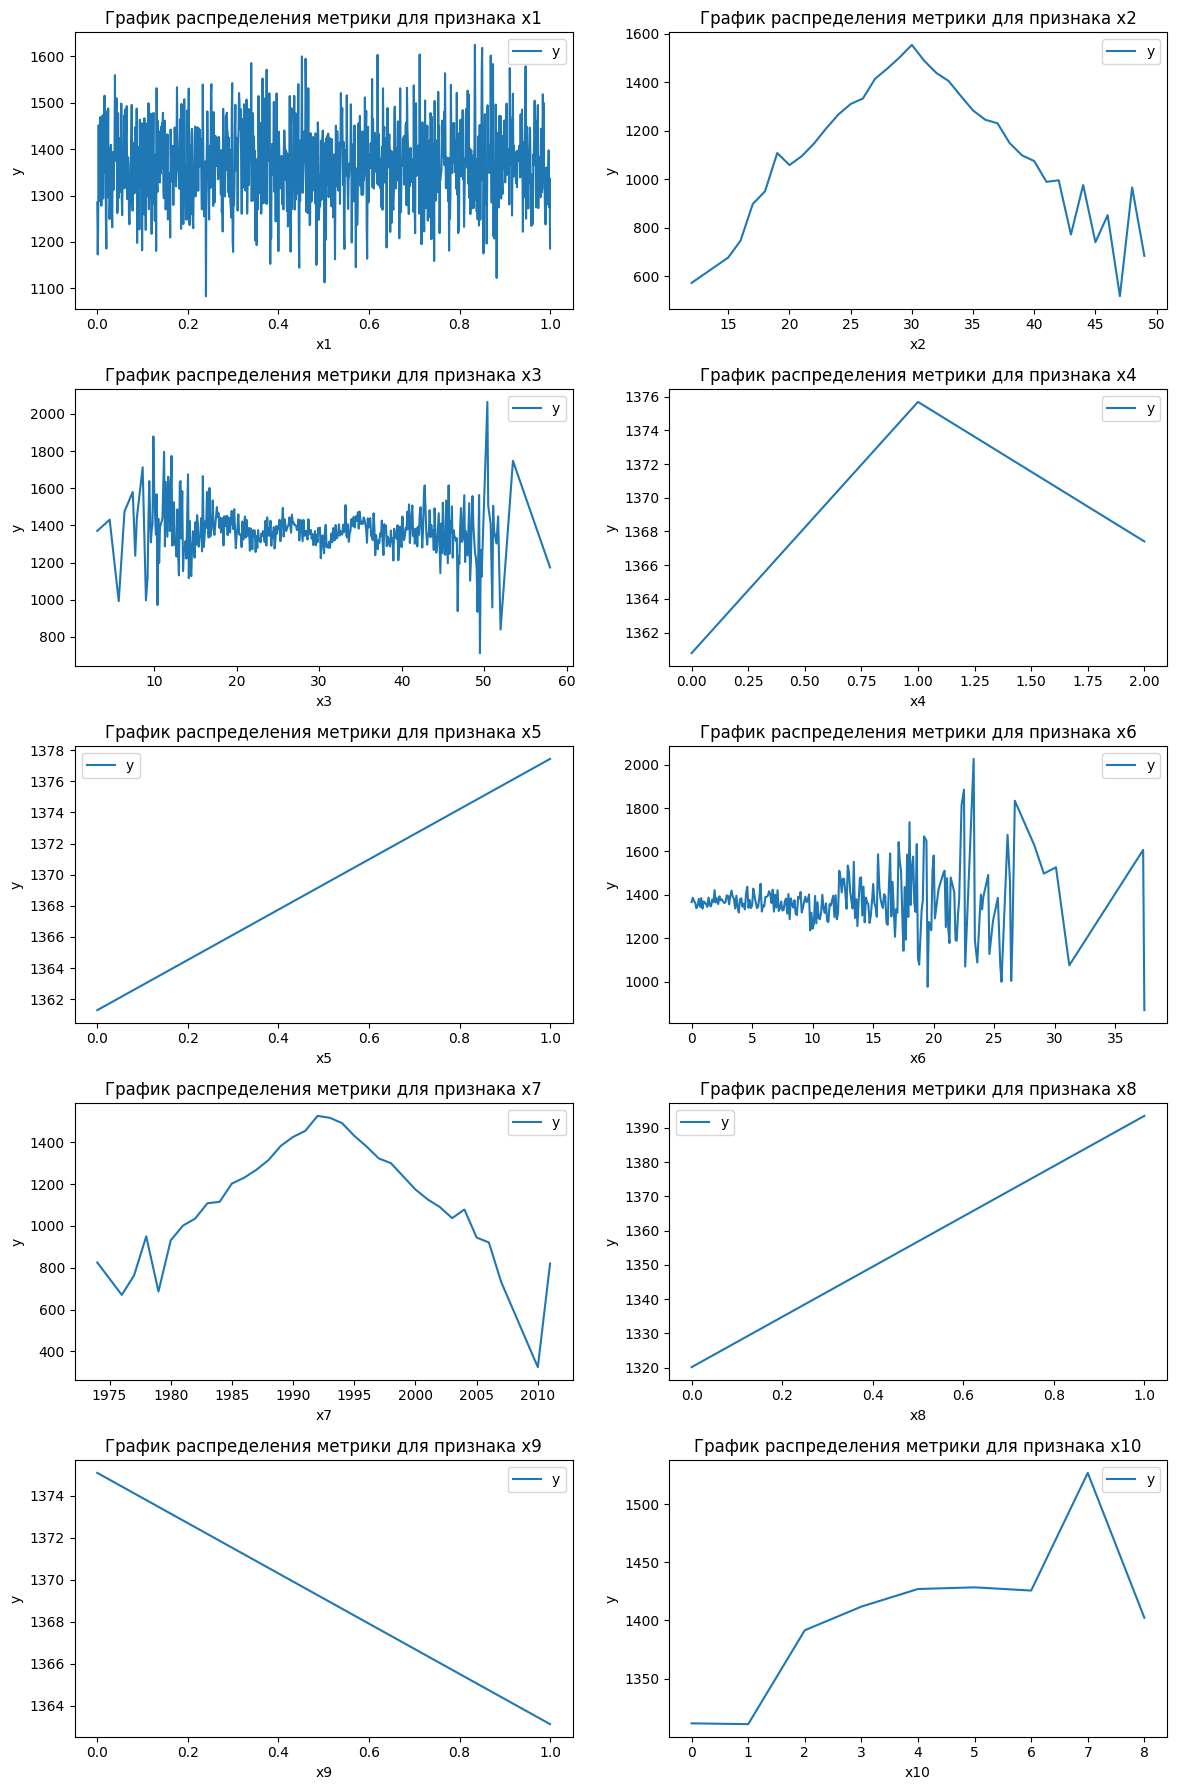

In [12]:
fig, axs = plt.subplots(int((len(df.columns)-1)/2), 2, figsize=(12, 18))

for ax, column in zip(axs.flat, df.columns):
    if column.startswith('x'):
        grouped_data = df.groupby(column, as_index=False).agg({'y':'mean'})
        ax.plot(grouped_data[column], grouped_data['y'], label='y')
        ax.set_title(f'График распределения метрики для признака {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('y')
        ax.legend()

plt.tight_layout()
plt.show()

Признак х2 похож на возраст, а прзнак x7 похож на год рождения. Часто возраст влияет на поведения пользователей, поэтому для стратификации можно использовать эти признаки.

In [15]:
def get_strats(df: pd.DataFrame):
    """Возвращает страты объектов.

    :return (list | np.array | pd.Series): список страт объектов размера len(df).
    """
    # YOUR_CODE_HERE
    return pd.qcut(
        df['x7'],
        q=11,
        labels=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']
    )


def calculate_strat_var(df):
    """Вычисляет стратифицированную дисперсию популяции."""
    strat_vars = df.groupby('strat')['y'].var()
    weights = df['strat'].value_counts(normalize=True)
    stratified_var = (strat_vars * weights).sum()
    return stratified_var


if __name__ == "__main__":
    bound = 50000
    df = pd.read_csv('stratification_task_data_public.csv')
    strats = get_strats(df.drop('y', axis=1))
    assert len(strats) == len(df), "Неверный размер списка страт"
    min_part = pd.Series(strats).value_counts(normalize=True).min()
    assert min_part >= 0.05, "Минимальная доля одной из страт меньше 5%"
    df['strat'] = strats
    strat_var = calculate_strat_var(df)
    err_msg = f"Дисперсия равна {strat_var:0.1f}, её нужно снизить до {bound}"
    assert strat_var <= bound, err_msg
    print(f'Отлично! Дисперсия равна {strat_var:0.1f}, меньше порога {bound}')

Отлично! Дисперсия равна 49660.1, меньше порога 50000
